# K-Mean 觀察 : 使用輪廓分析

# [作業目標]
- 試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較

# [作業重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [46]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns; sns.set()

np.random.seed(5)

%matplotlib inline

In [22]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

In [23]:
# 計算並繪製輪廓分析的結果


For n_clusters = 2 The average silhouette_score is : 0.5027144446956527
197


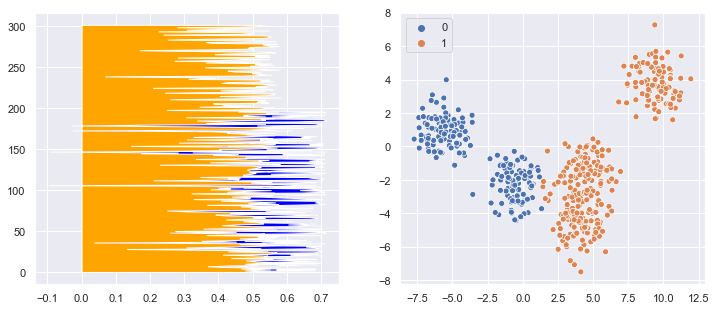

In [50]:
range_n_clusters = [2]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    
    model = KMeans(n_clusters = n_clusters, random_state=10)
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    
    cluster_labels_0 = np.sort(sample_silhouette_values[cluster_labels ==0])
    cluster_labels_1 = np.sort(sample_silhouette_values[cluster_labels ==1])
    print(cluster_labels_0.size)
    
    ax1.fill_betweenx(np.arange(0, cluster_labels_0.size),
                          sample_silhouette_values[cluster_labels ==0], facecolor="blue")
    
    ax1.fill_betweenx(np.arange(0, cluster_labels_1.size),
                          sample_silhouette_values[cluster_labels ==1], facecolor="orange")
    
    sns.scatterplot(x=X[:, 0], y=X[:,1], hue=cluster_labels ,  ax=ax2)